In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, fclusterdata
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
import mplleaflet
#plt.hold(True)


In [3]:


# plt.figure(figsize=(10, 7))
# plt.title("Dendogram for cluster")
# dend = shc.dendrogram(shc.linkage(np.array(df[["lat", "lon"]]), method='ward'))

df = pd.read_pickle("temp.pkl")
df =  df.loc[df["fahrzeugtyp"] == "anyVehicle"].copy()
df =  df.loc[df["time"] == "2021-01-31T01:00:39.074+01:00"].copy()
data = np.array(df[["lat", "lon"]])
np.random.shuffle(data)
data = data


[1503 2446  902 ... 1351 1642 1130]
[ 809 1309  487 ...  712  881  599]
[ 609 1023  358 ...  532  658  442]
[532 914 314 ... 465 575 385]
[469 832 277 ... 411 509 338]


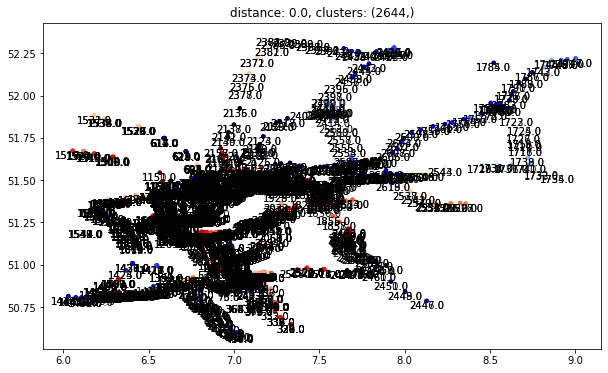

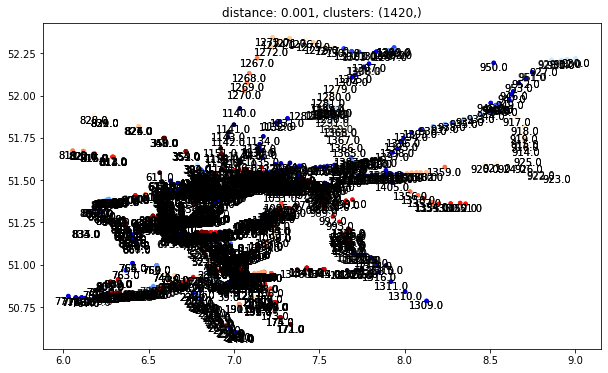

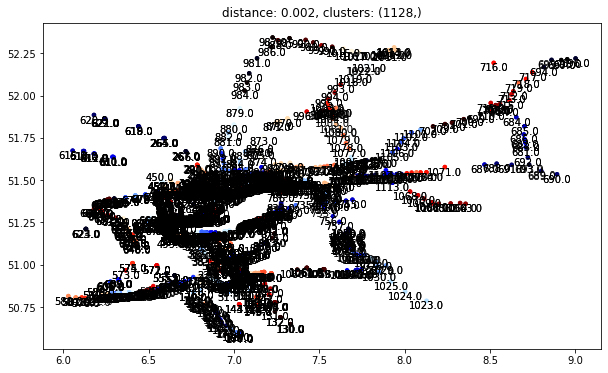

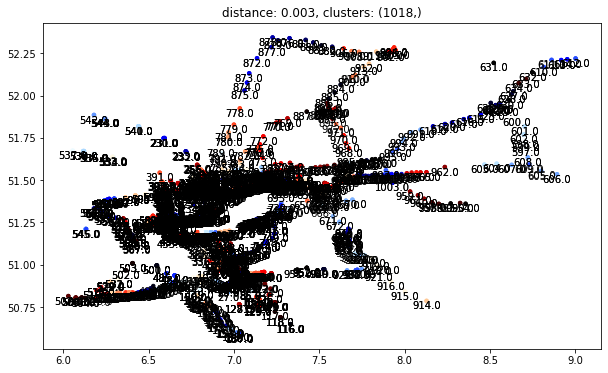

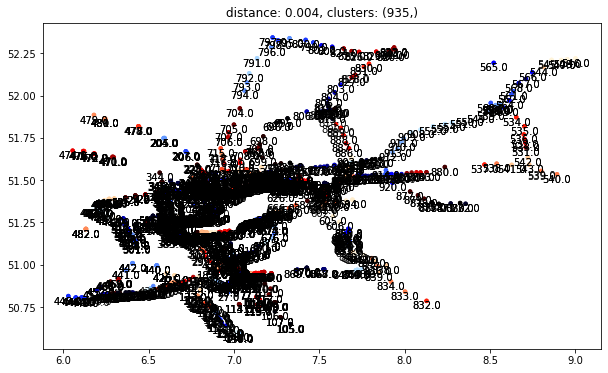

In [7]:
for t in np.arange(0.000,0.005,0.001):
    y_pred = fcluster(shc.linkage(data, method="ward"), t, criterion='distance')
    print(y_pred)
    cluster_size = np.unique(y_pred).shape
    # plt.scatter(np.unique(y_pred).shape, t)

    plot_data = np.append(data,np.atleast_2d(y_pred).T, axis=1)
    df_plot = pd.DataFrame(plot_data, columns=["lon", "lat", "cluster"])
    df_plot.cluster = df_plot.cluster.astype(int)
    # plt.figure()
    # plt.title(f"distance: {t}, clusters: {cluster_size}")
    # plt.scatter(df_plot["lat"].values, df_plot["lon"].values,
    #             c=df_plot.cluster.values, cmap='flag', s=7)

    fig, ax = plt.subplots(figsize=(10,6))
    plt.title(f"distance: {t}, clusters: {cluster_size}")
    plt.scatter(df_plot["lat"].values, df_plot["lon"].values,
                c=df_plot.cluster.values, cmap='flag', s=12)

    for index, row in df_plot.iterrows():
        ax.annotate(row['cluster'],
                     (row['lat'], row['lon']),
                     horizontalalignment='center',
                     verticalalignment='top',
                     size=10, color="black")

    

In [5]:
ax.yaxis._gridOnMajor = True
ax.xaxis._gridOnMajor = True


In [6]:
mplleaflet.show(fig=fig)

C:\Users\JFB\anaconda3\envs\SDD-Aggregator\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
